# Week 3 - Data Visualization using Matplotlib and Seaborn

## Learning Objective
+ Introduction to Matplotlib
    + Understanding parts of a figure
    + Introduction to pyplot
    + Working with multiple plots
+ Introduction to Seaborn
    + Overview of plotting functionality
    + Error bars and distribution summaries
    + Visualizing categorical data
    + Visualizing multivariate data
+ Visualizing Geographic Data

The contents of this tutorial are based on [matplotlib tutorial](https://matplotlib.org/tutorials/index.html), [seaborn tutorial](https://seaborn.pydata.org/tutorial/function_overview.html), another [seaborn tutorial](https://seaborn.pydata.org/introduction.html) and "Data Analysis and Visualization  Using Python" by Dr. Ossama Embarak.

For this tutorial you would need to have matplotlib and seaborn installed. You can do so using the following commands:
```
conda install -c anaconda matplotlib
conda install -c anaconda seaborn
```

# Loading dataset

Let us use a classic dataset - a waiter's tips dataset. We can load the csv using pandas.

In [1]:
import pandas as pd

tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Introduction to Matplotlib

Matplotlib is a Python plotting library that produces high-quality figures in a variety of formats and across platforms. In matplotlib, you can add features one by one, such as adding a title, labels, legends, and more.

Matplotlib graphs your data on Figures (i.e., windows, Jupyter widgets, etc.), each of which can contain one or more Axes (i.e., an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, or x-y-z in a 3D plot, etc.). 

## Understanding parts of a figure
Let us understand the components of a matplotlib figure to better understand all the terms.

<img src = "https://matplotlib.org/_images/anatomy.png">

[```Figure```](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) constitutes of subplots, sub axis, titles, subtitles, legends, everything inside the plot but an overview. So, Figure object is a box-like container holding one or more Axes (actual plots). An [```Axes```](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes) actually translates into what we think of as an individual plot or graph. The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system. Almost every “element” of a chart has its own manipulable Python object, all the way down to the ticks and labels.

## Introduction to Pyplot

The easiest way to create a new figure is with pyplot. The ```matplotlib.pyplot``` provides a collection of functions which make some change to a figure, e.g. creating a figure, creating a plotting area in a figure, plotting some lines, etc. 

It is important to note that all the plotting functions expect numpy array as input. Classes that are 'array-like' such as pandas data objects and ```numpy.matrix``` may or may not work as intended. It is best to convert these to numpy array objects prior to plotting.

For Jupyter notebooks, we set ```%matplotlib inline``` to output the plotting commands inline in our notebooks.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

### Line Plot

Let us create aggregate the tips collected per day and the worth of the food served on the day. We can then try to see if there is a trend in the tips collected and the day of the week. 

In [3]:
tipsbyday = tips.groupby("day", sort=False).mean()
tipsbyday

,total_bill,tip,size
day,,,
Sun,21.410000,3.255132,2.842105
Sat,20.441379,2.993103,2.517241
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263


In [4]:
tipsbyday = tipsbyday.reindex(["Thur","Fri","Sat","Sun"])
tipsbyday

,total_bill,tip,size
day,,,
Thur,17.682742,2.771452,2.451613
Fri,17.151579,2.734737,2.105263
Sat,20.441379,2.993103,2.517241
Sun,21.410000,3.255132,2.842105


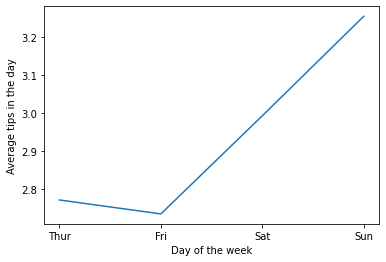

In [5]:
plt.plot(tipsbyday['tip'])
plt.xlabel('Day of the week')
plt.ylabel('Average tips in the day')
plt.show()

We see that the average tips collected by the waiter decrease before the weekend, and increases during the weekend, which is a considerably expected trend. 

### Scatterplot
A scatter plot shows the relationship between two factors of an experiment. A trend line is used to determine positive, negative, or no correlation. We can create a scatterplot using the original tips dataset to view the relation between the total bill and the tips in the dataset. A line plot does not suit in this case, as we do not want to see a trend.

We can add the detail of whether the person smoked or not using color. For that we would have to recode the category of smoker and non-smoker to colors. 

To create a scatter plot with a legend one may use a loop and create one scatter plot per item to appear in the legend and set the label accordingly. We can use [```plt.subplots```](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html) and get figure and axes objects. We can see using ```plt.subplots()``` that it returns us ```Figure``` and ```Axes``` handles. By default only one axes is created. The hierarchical nature of the plots can also be verified.

<class 'matplotlib.axis.YTick'>
<class 'matplotlib.axis.YTick'>


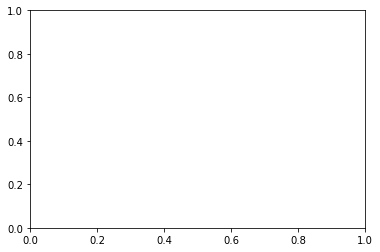

In [6]:
fig, ax = plt.subplots()

print(type(fig.axes[0].yaxis.get_major_ticks()[0]))
print(type(ax.yaxis.get_major_ticks()[0]))

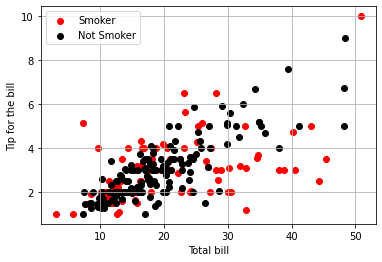

In [7]:
fig, ax = plt.subplots()

class_map = {"Yes":"Smoker","No":"Not Smoker"}
colors = {"Yes":"Red", "No":"Black"}

for cl, c in colors.items():
    ax.scatter('total_bill','tip', c=c, label=class_map[cl], data=tips[tips["smoker"]==cl])
    
ax.set_xlabel('Total bill')
ax.set_ylabel('Tip for the bill')
ax.legend()
ax.grid(True)

plt.show()

### Bar Plot

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. Bar plots are many times useful to see counts of some categorical variables. 

We can visualize the distribution of the size of group of diners, i.e. whether most dined in group of 2, 3, etc. 

In [8]:
groupsize = tips['size'].astype("category")
groupsize = groupsize.value_counts()
groupsize

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

We should convert this data to categories list and height list for plotting the bar graph. As we have noted previously, it is encouraged to work in numpy for matplotlib. So let us create appropriate numpy arrays.

In [9]:
import numpy as np

sz = np.array(groupsize.index.values)
ht = groupsize.to_numpy()

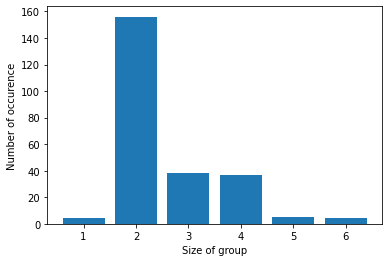

In [10]:
plt.bar(sz, ht)
plt.xlabel("Size of group")
plt.ylabel("Number of occurence")
plt.show()

## Working with multiple plots

```Pyplot``` has a concept of the current figure and the current axes. All plotting functions apply to the current axes. The function ```gca``` returns the current axes, and ```gcf``` returns the current figure. Normally, you don't have to worry about this, because it is all taken care of behind the scenes. 

We can use the [```plt.subplots()```](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html) function we previously used to manage multiple plots. The ```subplots``` returns the Figure and Axes (or array of Axes if more than one subplot is created).

Let us visualize the total bill vs tip plot, but with the contrast of Lunch vs Dinner. Rather than using color, let us use two plots for viewing data for different time of the day.

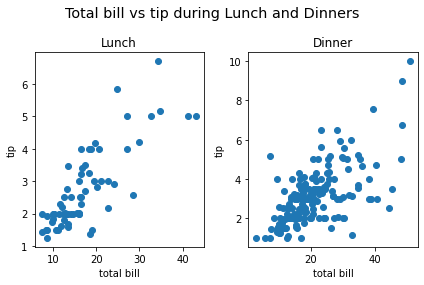

In [11]:
plt.figure()
plt.suptitle("Total bill vs tip during Lunch and Dinners", fontsize="x-large")

plt.subplot(1,2,1)
plt.scatter('total_bill','tip', data=tips[tips['time']=="Lunch"])
plt.title("Lunch")
plt.xlabel("total bill")
plt.ylabel("tip")

plt.subplot(1,2,2)
plt.scatter('total_bill','tip', data=tips[tips['time']=="Dinner"])
plt.title("Dinner")
plt.xlabel("total bill")
plt.ylabel("tip")

plt.tight_layout()   #added to prevent overlapping of labels
plt.show()

# Introduction to Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn is a complement, not a substitute to Matplotlib, but it makes a few-well defined hard usual tasks easy to do. 

## Overview of Plotting Functionality
The seaborn namespace is flat; all of the functionality is accessible at the top level. But the code itself is hierarchically structured, with modules of functions that achieve similar visualization goals through different means. Most of the docs are structured around these modules: you’ll encounter names like “relational”, “distributional”, and “categorical”. In addition to the different modules, there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The axes-level functions plot data onto a single ```matplotlib.pyplot.Axes``` object, which is the return value of the function.
In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a [```FacetGrid```](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid), that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. 

An high-level view of the organization as available in the [tutorial website](https://seaborn.pydata.org/tutorial/function_overview.html) is:
 <img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

For example, ```displot()``` is the figure-level function for the distributions module. Its default behavior is to draw a histogram, using the same code as ```histplot()``` behind the scenes. Figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes.

Let us continue with the same dataset. First we will import the library.

In [12]:
import seaborn as sns

sns.set_theme()

The [```set_theme```](https://seaborn.pydata.org/generated/seaborn.set_theme.html) function sets the matplotlib parameters and hence the theme will now apply to all plots using matplotlib - whether plotted through seaborn or not. In matplotlib, we can use the utility ```plt.style.use()```. The default for ```set_theme``` is ```darkgrid```.

Now we can plot the visualization of tip vs total bill with after adding the dimensions of smoker (like earlier) and also size of the group. As we know, too much information becomes difficult to understand in a single plot. However, the aim here is to demonstrate how easy it is to create the plot using seaborn.

Unlike when using matplotlib directly, it isn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handles the translation from values in the dataframe to arguments that matplotlib understands.

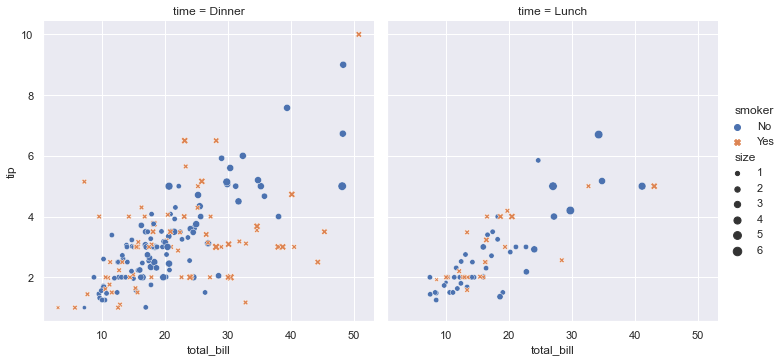

In [13]:
sns.relplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size")

We can also visualize the joint distribution between total bill and the tip given. The size of the group can also be visualized along with it very easily using seaborn. The [```jointplot```](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately

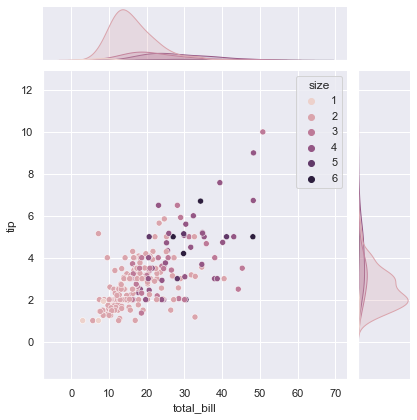

In [14]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="size")

Let us define a new column - percent tip, which is the percentage of the bill which was given as tip. Higher the percent-tip, better tipper the person can be considered. We can then try to do some interesting analysis using this percent-tip.

In [15]:
tips['percent_tip'] = tips['tip']*100/tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


We can first try to find the correlation between the various numeric data types in the dataset - i.e. are they negatively or positively correlated and how strongly.

<AxesSubplot:>

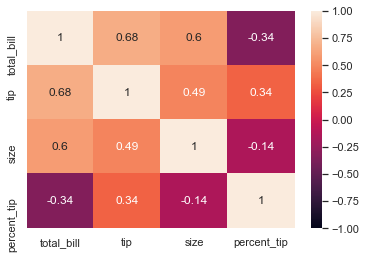

In [16]:
sns.heatmap(tips.corr(), vmin=-1, vmax=1, annot=True)

### Plotting Distributional Summaries

Using seaborn, plotting bar plots, along with distribution estimates is also extremely simple. We can see the distribution during during Lunch and Dinner - i.e. when does the restaurant seem to attract more crowd. The answer should intuitively be dinner. Do people tend to be better tippers during dinner too?

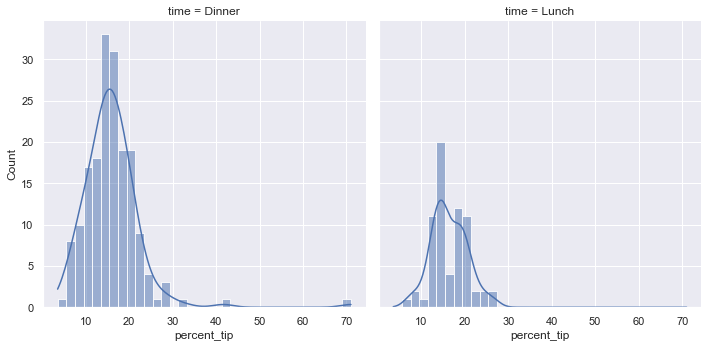

In [17]:
sns.displot(data=tips, x="percent_tip", col="time", kde=True)

The distributions module has several axes-level functions such as ```histplot()```, ```kdeplot()```, and ```rugplot()```. They are grouped together within the figure-level ```displot()```, ```jointplot()```, and ```pairplot()``` functions. 

Now let us convert size, smoker, sex and day to category rather than numeric and object. This will prevent size from coming up in numeric data type computation. However, do note that we may or may not want to treat the size as categorical variable - for example, for the correlation analysis, we preferred seeing the correlation between size and percent-tip.

In [18]:
tips['size'] = tips['size'].astype("category")
tips['smoker'] = tips['smoker'].astype("category")
tips['sex'] = tips['sex'].astype("category")
tips['day'] = tips['day'].astype("category")

Seaborn also has ```kdeplot``` which plots the kernel density estimate of all the numeric data. You can alternatively also pass the specific data you are interested in too. As this is an axes level function, you can pass [```rugplot```](https://seaborn.pydata.org/generated/seaborn.rugplot.html) along with the plot. Rugplot plots marginal distributions by drawing ticks along the x and y axes. 

<AxesSubplot:ylabel='Density'>

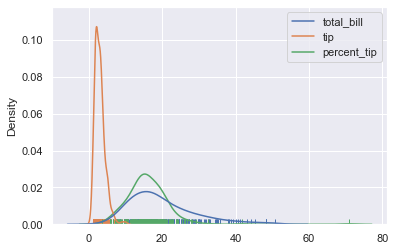

In [19]:
sns.kdeplot(data=tips)
sns.rugplot(data=tips)

### Statistical Estimates

When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

Using seaborn, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using [```lmplot```](https://seaborn.pydata.org/generated/seaborn.lmplot.html). We can see if the trend differs among smokers and non-smokers and also vary according to time of the meal. The linear regression gives better visualization than just the scatterplot. Note that ```lmplot``` is a figure-level function. An axes-level alternative to this is the [```regplot```](https://seaborn.pydata.org/generated/seaborn.regplot.html#seaborn.regplot).

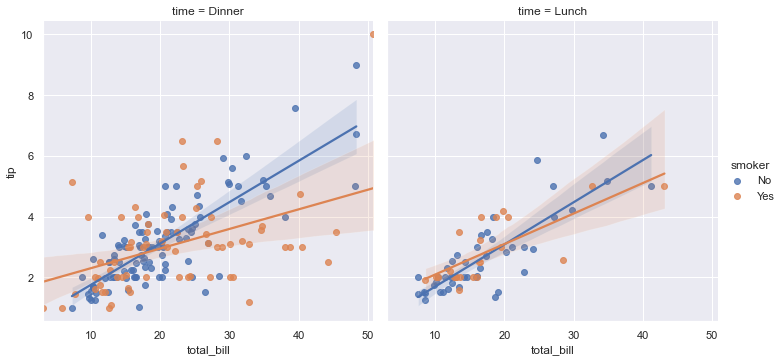

In [20]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

### Specialized Plots for Categorical Data

The [```catplot```](https://seaborn.pydata.org/generated/seaborn.catplot.html) function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The ```kind``` parameter selects the underlying axes-level function to use. Selecting ```kind="swarm"``` creates a swarm plot, which allows visualizing individual observation. It is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution. It is essentially a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap.

Suppose we want to visualize the pattern of the tippers across days of week and smoker. 

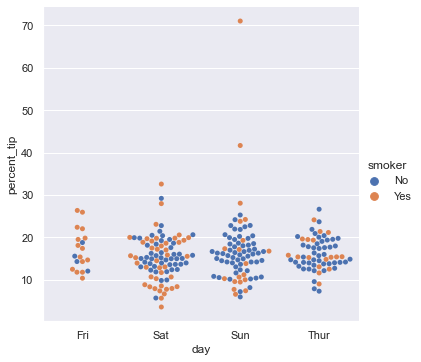

In [21]:
sns.catplot(data=tips, kind="swarm", x="day", y="percent_tip", hue="smoker")

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. It can be plotted using ```barplot``` or using ```kind="bar"``` when plotting categorical variable using ```catplot```.

Let us try to answer the question of whether the percent-tip and the group size have some pattern? Also, do the smokers tend to be better or worse tippers when alone vs when in groups?

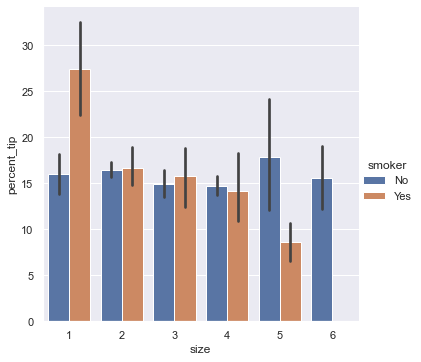

In [22]:
sns.catplot(data=tips, kind="bar", x="size", y="percent_tip", hue="smoker")

Similarly we can see if the pattern various across the gender, and if the females or males, tend to be better tippers? And does the pattern change when in group?

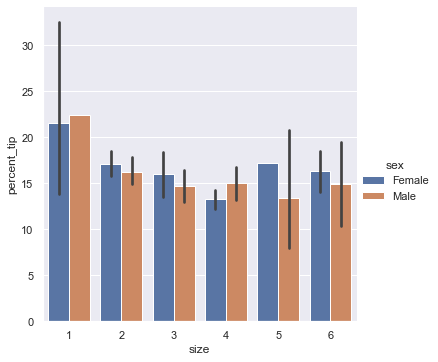

In [23]:
sns.catplot(data=tips, kind="bar", x="size", y="percent_tip", hue="sex")

## Visualization on Multivariate Dataset

Let us load another classic dataset, available in seaborn too - IRIS dataset. The data is about 3 types of iris plants, and some features regarding samples of these plants. We load this dataset as it has more numeric columns and they are separable with the classes.

In [24]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can get some visual understanding of the descriptive statistics of the four numeric columns using a [```boxplot```](https://seaborn.pydata.org/generated/seaborn.boxplot.html). A boxplot is a method for graphically depicting groups of numerical data through their quartiles.

<AxesSubplot:>

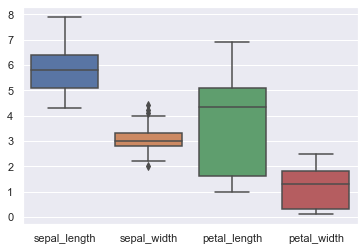

In [25]:
sns.boxplot(data=iris)

Similar to previous dataset, we can view the correlation heatmap and joint distribution between two highly correlated columns. We can view this joint distribution on background of the three species to see if the values look different for different species. 

<AxesSubplot:>

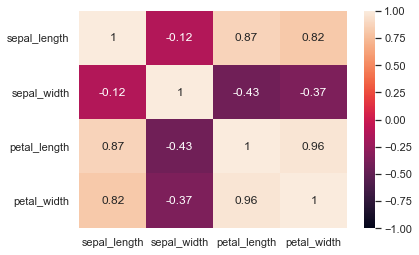

In [26]:
sns.heatmap(iris.corr(), vmin=-1, vmax=1, annot=True)

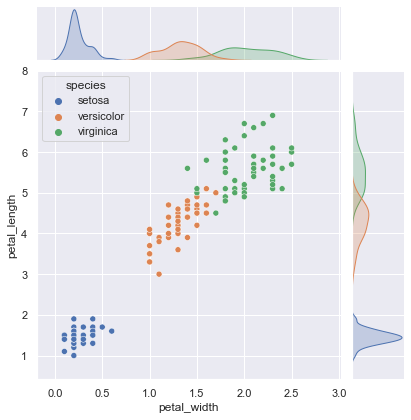

In [27]:
sns.jointplot(data=iris, x="petal_width", y="petal_length", hue="species")

The ```jointplot``` focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution.

The ```pairplot``` on the other hand, shows joint and marginal distributions for all pairwise relationships and for each variable, respectively.

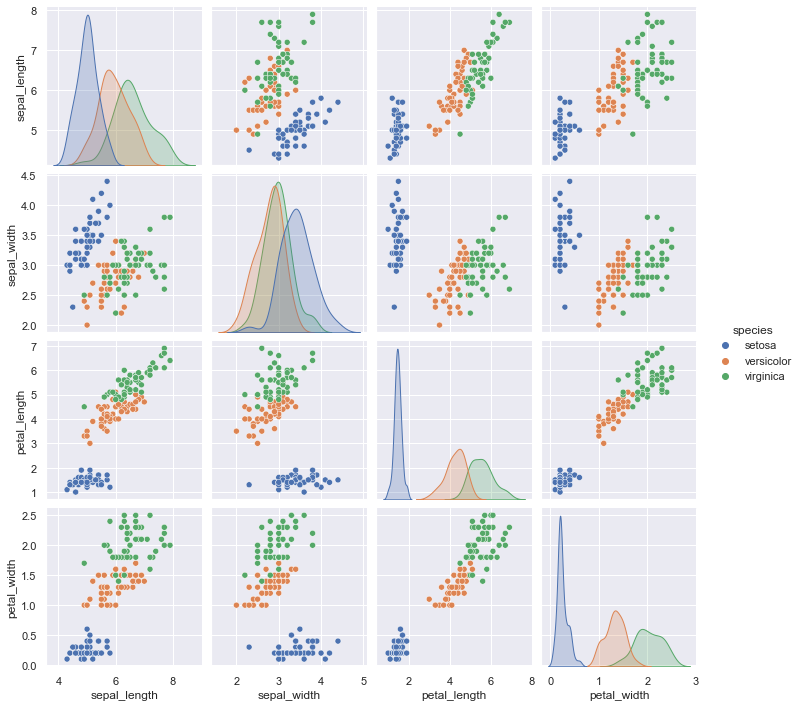

In [28]:
sns.pairplot(data=iris, hue="species")

Such plots help to understand the importance of adding third dimension in our visualization. If we just view the correlations and two dimensional visualization, we may not be able to distinguish between the various species. 

## Multiple seaborn plots

We can integrate the seaborn plots with the matplotlib subplots too. The axes-level functions of seaborn accept an ```ax=``` argument which lets us specify where the plot should be placed. We can plot two different plots from two different datasets side-by-side. This is generally useful, when we want to plot graphs for presentations and publications and need comparitive analysis. 

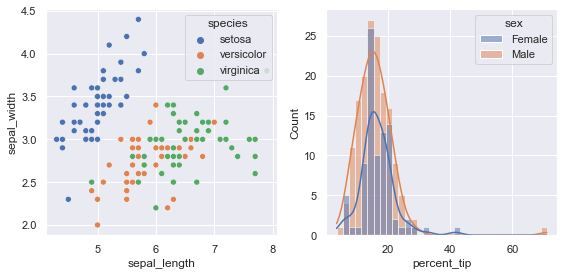

In [29]:
f, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", ax=axs[0])
sns.histplot(data=tips, x="percent_tip", hue="sex", kde=True, ax=axs[1])
f.tight_layout()

# Visualizing Geographic Data on Map

Geographic data is essentiall points defined by latitude and longitude. So, we can plot it using scatterplot, and overlay on the desired map. It is important here to set the x-axis and y-axis limits so that the scatter plot accurately plots the data on the image. 

Remember that the x-axis is given by the longitude values and y-axis is given by latitutde values.

Let us load the map image for NUS available from openstreetmap.org. The bounding box for this image in terms of latitutde and longitude is:
```[1.2897 1.3091 ]```
```[103.7678 103.7853]```

Let us map the point for ERC in UTown is: (1.306391, 103.773113).


In [30]:
nus_map = plt.imread('map.png')

BBox = [103.7678, 103.7853, 1.2897, 1.3091]

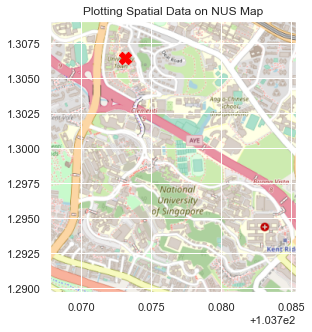

In [31]:
fig, ax = plt.subplots(figsize = (6,5))

ax.imshow(nus_map, zorder=0, extent=BBox, aspect="equal")
ax.set_title('Plotting Spatial Data on NUS Map')
ax.scatter(x=103.773113, y=1.306391, s=150.0, c="red", marker="X")

plt.show()

## Practice Exercise (Optional)
1. Look up the documentation for ```plt.pie``` and create a Pie Chart for the proportion of females vs males who paid the bill in the tips dataset.
2. Visualize using appropriate chart: Proportion of smokers during lunch and dinner in the tips dataset. 
3. Visualize using appropriate chart: Do waiters tend to get better tips during dinner or lunch?
3. Change the color range for the correlation heatmap. As the correlation matrix is symmetric, only triangular portion is informative for the plot. Can you create a triangular heatmap?